In [2]:
from google.colab import files
uploaded = files. upload ( )

Saving bank.csv to bank.csv


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv('bank.csv')

print(data.head())

print("\nDataset Info:")
print(data.info())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data col

In [9]:
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows:")
print(data.head())
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

Dataset Shape: (11162, 10)

First 5 Rows:
   job  marital  education  housing  contact  day  month  duration  poutcome  \
0    0        1          1        1        2    5      8      1042         3   
1    0        1          1        0        2    5      8      1467         3   
2    9        1          1        1        2    5      8      1389         3   
3    7        1          1        1        2    5      8       579         3   
4    0        1          2        0        2    5      8       673         3   

   deposit  
0        1  
1        1  
2        1  
3        1  
4        1  

Data Types:
 job          int64
marital      int64
education    int64
housing      int64
contact      int64
day          int64
month        int64
duration     int64
poutcome     int64
deposit      int64
dtype: object

Missing Values:
 job          0
marital      0
education    0
housing      0
contact      0
day          0
month        0
duration     0
poutcome     0
deposit      0
dtype: int64


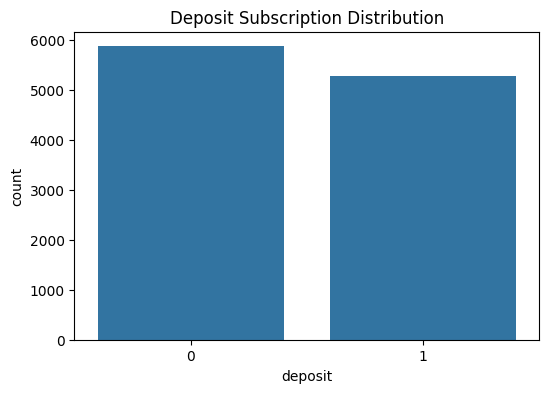


Target Class Balance:
deposit
0    0.52616
1    0.47384
Name: proportion, dtype: float64


In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', data=data)
plt.title('Deposit Subscription Distribution')
plt.show()

print("\nTarget Class Balance:")
print(data['deposit'].value_counts(normalize=True))

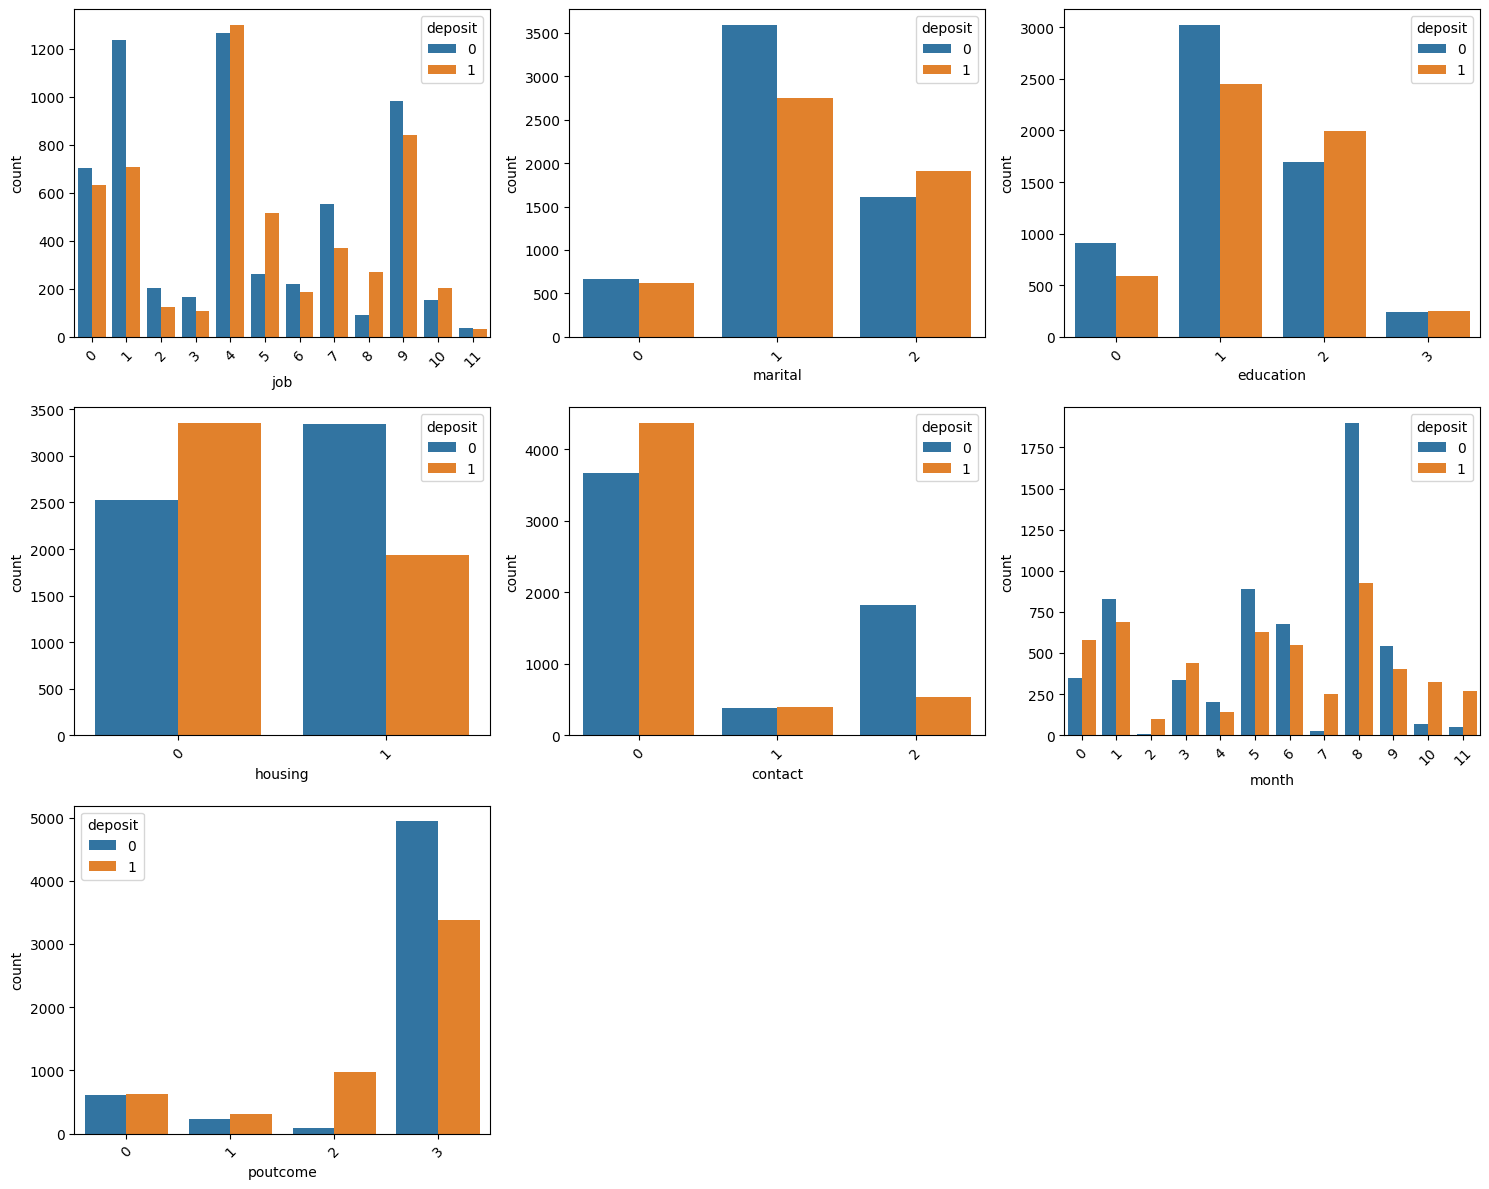

In [14]:
cat_cols = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
plt.figure(figsize=(15, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='deposit', data=data)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Numerical Features Summary:
                day      duration
count  11162.000000  11162.000000
mean      15.658036    371.993818
std        8.420740    347.128386
min        1.000000      2.000000
25%        8.000000    138.000000
50%       15.000000    255.000000
75%       22.000000    496.000000
max       31.000000   3881.000000


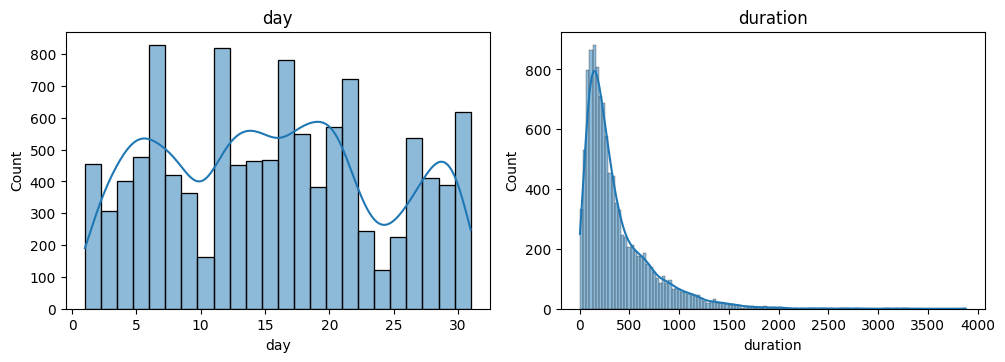

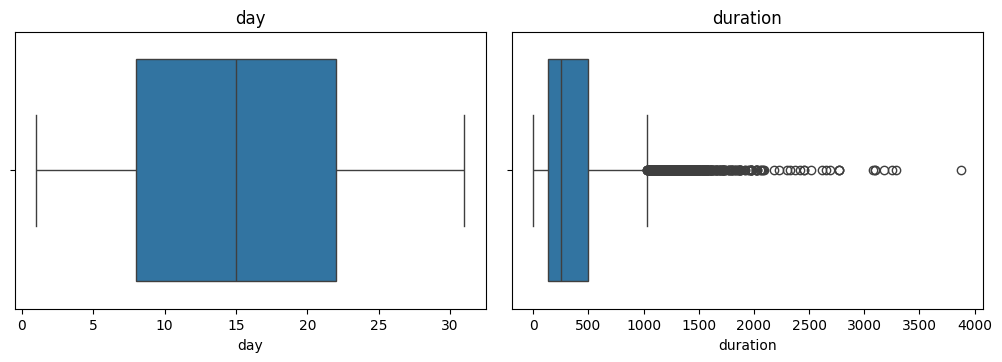

In [16]:
num_cols = ['day', 'duration']

print("\nNumerical Features Summary:")
print(data[num_cols].describe())

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [5]:
encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

data = data.drop(['age', 'default', 'balance', 'loan', 'campaign', 'pdays', 'previous'], axis=1)

X = data.drop('deposit', axis=1)
y = data['deposit']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.77
Random Forest Accuracy: 0.82
SVM Accuracy: 0.70


In [8]:
print("\nModel Accuracies:")
for model, acc in results.items():
    print(f"{model}: {acc*100:.2f}%")


Model Accuracies:
Logistic Regression: 76.58%
Random Forest: 82.22%
SVM: 70.49%
